In [170]:
import pandas as pd

raw_data = pd.read_csv(r"C:\Repos\reddit-capstone\reddit-capstone\reddit-capstone\reddit_news_2017_all.csv", encoding = "utf-8", low_memory=False)

raw_data.iloc[:10,:]

,author,author_flair_text,created,created_utc,domain,id,is_self,locked,num_comments,over_18,permalink,score,subreddit,title,url
0,Bdiculous,NaN,1483261836,1483247436,wsiltv.com,5ldooz,False,False,6,False,/r/news/comments/5ldooz/4_dead_in_plane_crash_...,49,news,4 dead in plane crash in Southern Illinois,http://www.wsiltv.com/story/34160038/possible-...
1,mithun1990,NaN,1483262235,1483247835,youtube.com,5ldpju,False,False,1,False,/r/news/comments/5ldpju/পরথম_ট_টয়নটর_জনয_দল_ঘষ...,1,news,প্রথম টি টোয়েন্টির জন্য দল ঘোষণা BCB ll Game &...,https://www.youtube.com/attribution_link?a=PIj...
2,video_mania,NaN,1483262296,1483247896,indianexpress.com,5ldpq3,False,False,6,False,/r/news/comments/5ldpq3/us_states_leery_of_rus...,22,news,"US states, leery of Russia malware, re-examine...",http://indianexpress.com/article/world/us-stat...
3,randomdream,NaN,1483262642,1483248242,ndtv.com,5ldqgo,False,False,7,False,/r/news/comments/5ldqgo/north_koreas_kim_jong_...,0,news,North Korea's Kim Jong Says Development Of Lon...,http://www.ndtv.com/world-news/developing-long...
4,tranyen,NaN,1483262648,1483248248,inbaobigiarehn.wordpress.com,5ldqh8,False,False,1,False,/r/news/comments/5ldqh8/dịch_vụ_in_hộp_đựng_ví...,1,news,Dịch vụ in hộp đựng ví giá rẻ tại hà nội – In ...,https://inbaobigiarehn.wordpress.com/2016/12/1...
5,FantasticBurt,NaN,1483263941,1483249541,msn.com,5ldt45,False,False,7,False,/r/news/comments/5ldt45/2016_takes_another_goo...,0,news,2016 takes another good one on it's way out.,http://www.msn.com/en-us/tv/news/william-chris...
6,balaki1,NaN,1483264367,1483249967,niume.com,5ldty8,False,False,1,False,/r/news/comments/5ldty8/new_theory_on_the_myst...,1,news,New Theory on the Mystery of Bermuda Triangle ...,https://niume.com/post/210046
7,anakaine,NaN,1483264820,1483250420,news.com.au,5lduux,False,False,1,False,/r/news/comments/5lduux/mash_star_loses_battle...,1,news,MASH star loses battle with cancer - William C...,http://www.news.com.au/entertainment/tv/willia...
8,video_mania,NaN,1483265090,1483250690,channelnewsasia.com,5ldvia,False,False,5,False,/r/news/comments/5ldvia/new_yorks_times_square...,0,news,New York's Times Square erupts with cheer as a...,http://www.channelnewsasia.com/news/entertainm...
9,ClarisaLim21,NaN,1483265099,1483250699,99onlinebola.org,5ldviy,False,False,1,False,/r/news/comments/5ldviy/prediksi_watford_vs_to...,1,news,Prediksi Watford Vs Tottenham Hotspur 1 Januar...,http://99onlinebola.org/prediksi-watford-vs-to...


In [171]:
import pandas_profiling

pandas_profiling.ProfileReport(raw_data)


Number of variables,15
Number of observations,147285
Total Missing (%),6.7%
Total size in memory,13.9 MiB
Average record size in memory,99.0 B
Numeric,3
Categorical,7
Boolean,3
Date,0
Text (Unique),0
Rejected,2


In [352]:
import datetime as dt

# 99.9% missing, so not useful
raw_data_2 = raw_data.drop(["author_flair_text"], axis = "columns")

# same information as created, redundant
raw_data_2 = raw_data_2.drop(["created_utc"], axis = "columns")

# constant value ("news")
raw_data_2 = raw_data_2.drop(["subreddit"], axis = "columns")

#convert created column to readable date (from unixtime)
raw_data_2["created"] = pd.to_datetime(raw_data_2["created"], unit = 's', errors='ignore')

# want at least 2 comments (most of the 1-comments are spam, same as no comments)
reddit_submissions = raw_data_2[raw_data_2["num_comments"]>1]

# drop duplicate submissions (by title), keeping the one with the most comments
reddit_submissions.sort_values(by="num_comments", ascending=False, inplace=True)
reddit_submissions.drop_duplicates(subset=["title"], keep = "first", inplace = True)
reddit_submissions.sort_values(by="created", ascending=True, inplace=True)  # sort chronologically

# make sure everthing looks good
reddit_submissions.head(40)


C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,author,created,domain,id,is_self,locked,num_comments,over_18,permalink,score,title,url
0,Bdiculous,2017-01-01 09:10:36,wsiltv.com,5ldooz,False,False,6,False,/r/news/comments/5ldooz/4_dead_in_plane_crash_...,49,4 dead in plane crash in Southern Illinois,http://www.wsiltv.com/story/34160038/possible-...
2,video_mania,2017-01-01 09:18:16,indianexpress.com,5ldpq3,False,False,6,False,/r/news/comments/5ldpq3/us_states_leery_of_rus...,22,"US states, leery of Russia malware, re-examine...",http://indianexpress.com/article/world/us-stat...
3,randomdream,2017-01-01 09:24:02,ndtv.com,5ldqgo,False,False,7,False,/r/news/comments/5ldqgo/north_koreas_kim_jong_...,0,North Korea's Kim Jong Says Development Of Lon...,http://www.ndtv.com/world-news/developing-long...
5,FantasticBurt,2017-01-01 09:45:41,msn.com,5ldt45,False,False,7,False,/r/news/comments/5ldt45/2016_takes_another_goo...,0,2016 takes another good one on it's way out.,http://www.msn.com/en-us/tv/news/william-chris...
8,video_mania,2017-01-01 10:04:50,channelnewsasia.com,5ldvia,False,False,5,False,/r/news/comments/5ldvia/new_yorks_times_square...,0,New York's Times Square erupts with cheer as a...,http://www.channelnewsasia.com/news/entertainm...
11,calyco81,2017-01-01 10:16:15,reuters.com,5ldwxs,False,False,47,False,/r/news/comments/5ldwxs/china_will_never_allow...,38,"China will never allow anyone to ""make a great...",http://www.reuters.com/article/us-china-politi...
12,62FenderJazz,2017-01-01 10:24:25,theguardian.com,5ldxyg,False,False,7,False,/r/news/comments/5ldxyg/texas_federal_judge_ha...,19,Texas federal judge halts Obama protection of ...,https://www.theguardian.com/world/2016/dec/31/...
14,ScotHibb,2017-01-01 10:33:00,hollywoodlife.com,5ldyyz,False,False,242,False,/r/news/comments/5ldyyz/mariah_careys_performa...,476,Mariah Carey’s Performance On NYE — Leaves Aft...,http://hollywoodlife.com/2017/01/01/mariah-car...
18,svayam--bhagavan,2017-01-01 10:48:26,thehindu.com,5le0qt,False,False,13,False,/r/news/comments/5le0qt/chinese_firms_ordered_...,0,"Chinese firms ordered to pay $1,94,000 for cop...",http://www.thehindu.com/business/Industry/Chin...
19,julietrobert1231,2017-01-01 11:01:26,reuters.com,5le23x,False,False,3,False,/r/news/comments/5le23x/us_judge_blocks_transg...,18,"U.S. judge blocks transgender, abortion-relate...",http://www.reuters.com/article/us-usa-obamacar...


In [173]:
# take a second look at the summary statistics
pandas_profiling.ProfileReport(reddit_submissions)

Number of variables,13
Number of observations,70571
Total Missing (%),0.0%
Total size in memory,5.6 MiB
Average record size in memory,83.0 B
Numeric,3
Categorical,6
Boolean,3
Date,1
Text (Unique),0
Rejected,0


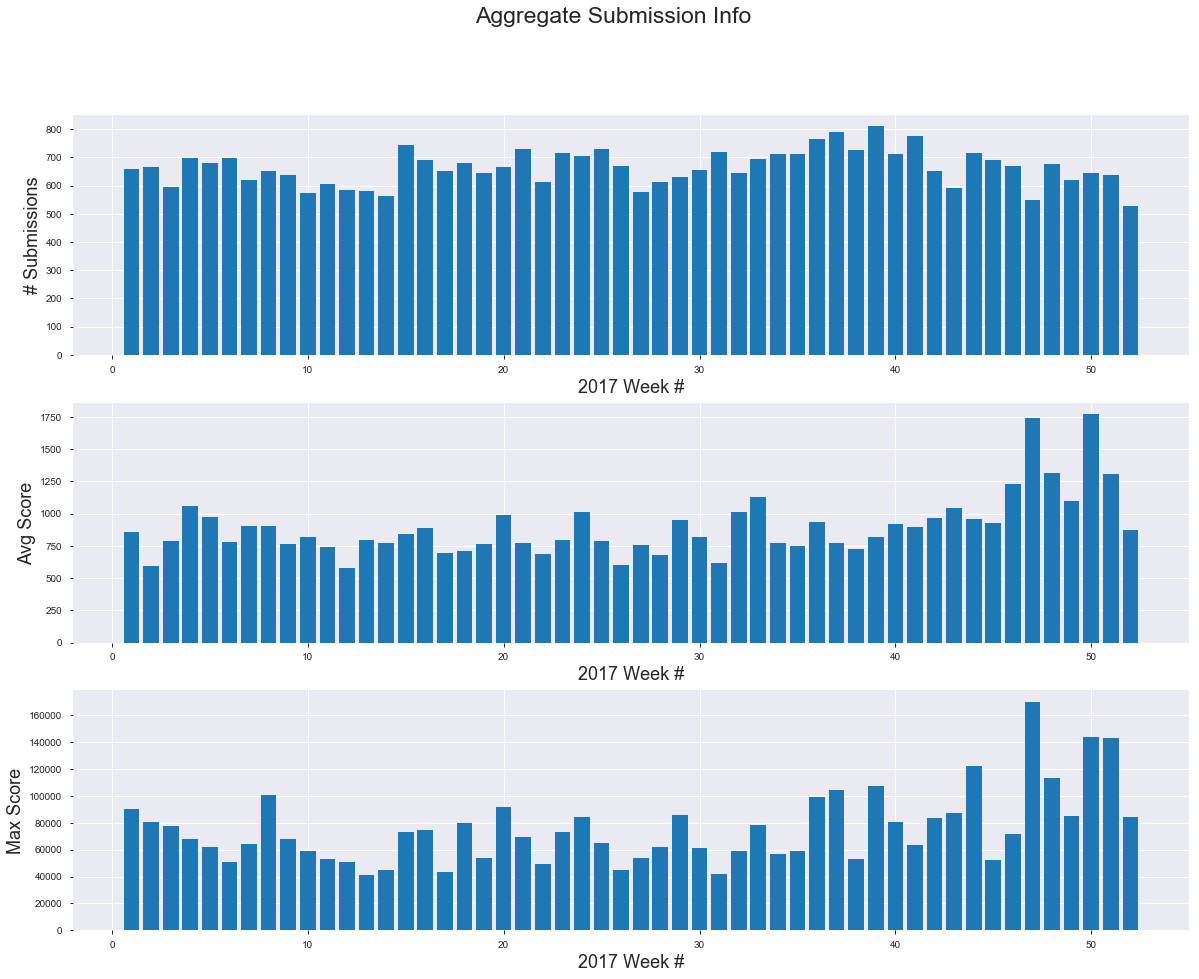

In [393]:
# count of scores/comments per day/week to correlate with major news events (primarily USA)

import time
import numpy as np
import matplotlib.pyplot as plt

# to show plot output in notebook
%matplotlib inline

date_info = reddit_submissions.copy()
# remove Subnday Jan 1st - part of 52nd week of 2016; could shift, but then Sun Dec 31 2017 would be pushed out (want 52 weeks)
date_info = date_info[date_info["created"]>=dt.date(2017,1,2)] 
date_info["week"] = date_info["created"].dt.week
date_info["month"] = date_info["created"].dt.month

num_comments_by_week = date_info.groupby(['week'])['score'].agg(['count','sum','mean','max'])

LABEL_SIZE = 18
X_LABEL = "2017 Week #"

fig = plt.figure(figsize=(20,15))
fig.add_subplot(3,1,1)
plt.suptitle("Aggregate Submission Info", fontsize = LABEL_SIZE+5)
plt.bar(num_comments_by_week.index, num_comments_by_week["count"])

# plt.xticks(range(5,260,22), calendar.month_name[1:13], rotation=20)
plt.ylabel('# Submissions', fontsize=LABEL_SIZE)
plt.xlabel(X_LABEL, fontsize=LABEL_SIZE)

fig.add_subplot(3,1,2)
plt.bar(num_comments_by_week.index, num_comments_by_week["mean"])

plt.ylabel('Avg Score', fontsize=LABEL_SIZE)
plt.xlabel(X_LABEL, fontsize=LABEL_SIZE)

fig.add_subplot(3,1,3)
plt.bar(num_comments_by_week.index, num_comments_by_week["max"])

plt.ylabel('Max Score', fontsize=LABEL_SIZE)
plt.xlabel(X_LABEL, fontsize=LABEL_SIZE)



In [354]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")

reddit_submissions.loc[:,"title"] = reddit_submissions["title"].replace("’|'|-|,", "", regex=True)

# don't care about case for now
reddit_submissions["title"] = reddit_submissions["title"].str.lower()

titles = reddit_submissions["title"]
title_tokens = titles.apply(tokenizer.tokenize)

title_tokens.head()

C:\Users\zande\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plane_axis)
C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    [4, dead, in, plane, crash, in, southern, illi...
2    [us, states, leery, of, russia, malware, reexa...
3    [north, koreas, kim, jong, says, development, ...
5    [2016, takes, another, good, one, on, its, way...
8    [new, yorks, times, square, erupts, with, chee...
Name: title, dtype: object

In [373]:
# Frequency of keywords overall

nltk.download("stopwords")

from nltk.corpus import stopwords

# a collection of common words such as "the", "a", "be", etc.
# may be useful in distinguishing keywords relating to the subject matter
s = set(stopwords.words('english'))

titles_kws = titles.apply(lambda title: [word for word in title.split() if word not in s])

titles_kws = titles_kws.apply(lambda t: ' '.join(t))

overall_freq = collections.Counter(" ".join(titles_kws).split())

overall_freq.most_common(30)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('man', 2357),
 ('police', 1859),
 ('us', 1433),
 ('new', 1378),
 ('says', 1333),
 ('woman', 1204),
 ('u.s.', 1113),
 ('arrested', 839),
 ('news', 807),
 ('killed', 770),
 ('found', 766),
 ('years', 696),
 ('say', 695),
 ('dead', 688),
 ('north', 667),
 ('school', 660),
 ('accused', 641),
 ('state', 620),
 ('charged', 613),
 ('death', 612),
 ('shooting', 583),
 ('first', 564),
 ('officer', 556),
 ('people', 554),
 ('white', 532),
 ('dies', 525),
 ('sex', 512),
 ('shot', 507),
 ('texas', 497),
 ('car', 482)]